In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import LogNorm
%matplotlib notebook 
%matplotlib inline

# These two lines allow for the notebook to automatically update to use the most
# up-to-date versions of the code being imported
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('/Users/Andrei/Documents/code/github/data_analysis')

# Todo: issues on mac OS when importing python functions in the same repo, how to fix this?
from src.basic_functions.fwhm import FWHM, FWHMe2

In [2]:
base_path = '/Users/Andrei/Box/ocpi/data/nitesh/lumerical_files/Data/'
filename = '461nmExpander20nmCore.txt'

In [3]:
data = pd.read_csv(base_path + filename, sep=" ", header=1,nrows=1)
numX = int(data.columns.values[0][5:-3])
x_DF = pd.read_csv(base_path + filename, sep=" ", header=1,nrows=numX)
data = pd.read_csv(base_path + filename, sep=" ", header=numX+2,nrows=1)
numY = int(data.columns.values[0][5:-3])
y_DF = pd.read_csv(base_path + filename, sep=" ", header=numX+2,nrows=numY)
optical_power_DF = pd.read_csv(base_path + filename, sep=" ", header=numX+2 + numY + 1)

In [4]:
optical_power_DF = pd.read_csv(base_path + filename, sep=" ", header = None, skiprows = numX + 2 + numY +5)
del optical_power_DF[0]
optical_power_DF

,1,2,3,4,5,6,7,8,9,10,...,2693,2694,2695,2696,2697,2698,2699,2700,2701,2702
0,1.893423e-11,1.895316e-11,1.898306e-11,1.900200e-11,1.904030e-11,1.906986e-11,1.909474e-11,1.913101e-11,1.917044e-11,1.919190e-11,...,1.920112e-11,1.916390e-11,1.913555e-11,1.909876e-11,1.906992e-11,1.902899e-11,1.901280e-11,1.897512e-11,1.894278e-11,1.891873e-11
1,1.902154e-11,1.901965e-11,1.905738e-11,1.907955e-11,1.912053e-11,1.914711e-11,1.917804e-11,1.921024e-11,1.923413e-11,1.926634e-11,...,1.927981e-11,1.924317e-11,1.921153e-11,1.917807e-11,1.915401e-11,1.911091e-11,1.909353e-11,1.906127e-11,1.902758e-11,1.899546e-11
2,1.908485e-11,1.911034e-11,1.915074e-11,1.915480e-11,1.920605e-11,1.923315e-11,1.926086e-11,1.929028e-11,1.932177e-11,1.935643e-11,...,1.934401e-11,1.932358e-11,1.929334e-11,1.925450e-11,1.923484e-11,1.919627e-11,1.916883e-11,1.913771e-11,1.911675e-11,1.907605e-11
3,1.917033e-11,1.920818e-11,1.922014e-11,1.922898e-11,1.929245e-11,1.931442e-11,1.934927e-11,1.937028e-11,1.940141e-11,1.943348e-11,...,1.942116e-11,1.938613e-11,1.937294e-11,1.934208e-11,1.931040e-11,1.927665e-11,1.925892e-11,1.921060e-11,1.919245e-11,1.915422e-11
4,1.925880e-11,1.927107e-11,1.927997e-11,1.932451e-11,1.938215e-11,1.938976e-11,1.942194e-11,1.943367e-11,1.946860e-11,1.950512e-11,...,1.950816e-11,1.946781e-11,1.944201e-11,1.941668e-11,1.939406e-11,1.935640e-11,1.934662e-11,1.928984e-11,1.927633e-11,1.923406e-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6289,1.526765e-06,1.541765e-06,1.556305e-06,1.570240e-06,1.583451e-06,1.595844e-06,1.607356e-06,1.617960e-06,1.627659e-06,1.636492e-06,...,1.636491e-06,1.627659e-06,1.617960e-06,1.607357e-06,1.595844e-06,1.583451e-06,1.570240e-06,1.556304e-06,1.541764e-06,1.526765e-06
6290,1.529165e-06,1.544760e-06,1.559867e-06,1.574320e-06,1.587981e-06,1.600743e-06,1.612530e-06,1.623305e-06,1.633067e-06,1.641853e-06,...,1.641852e-06,1.633067e-06,1.623305e-06,1.612529e-06,1.600742e-06,1.587981e-06,1.574319e-06,1.559866e-06,1.544760e-06,1.529165e-06
6291,1.528985e-06,1.545057e-06,1.560706e-06,1.575749e-06,1.590025e-06,1.603405e-06,1.615794e-06,1.627132e-06,1.637401e-06,1.646618e-06,...,1.646618e-06,1.637400e-06,1.627131e-06,1.615793e-06,1.603404e-06,1.590024e-06,1.575748e-06,1.560706e-06,1.545057e-06,1.528984e-06
6292,1.527756e-06,1.543834e-06,1.559605e-06,1.574884e-06,1.589501e-06,1.603314e-06,1.616214e-06,1.628124e-06,1.639004e-06,1.648852e-06,...,1.648851e-06,1.639003e-06,1.628123e-06,1.616214e-06,1.603313e-06,1.589500e-06,1.574883e-06,1.559606e-06,1.543834e-06,1.527756e-06


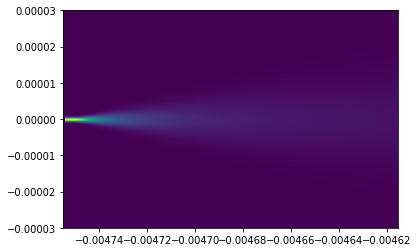

In [5]:
out_field = optical_power_DF.to_numpy()
Xarray = x_DF.to_numpy()
Yarray = y_DF.to_numpy()
X,Y = np.meshgrid(Xarray,Yarray)
out_field = np.transpose(out_field)
#out_field.reshape(len(Xarray),len(Yarray))
# Plot the density map using nearest-neighbor interpolation
plt.pcolormesh(X,Y,out_field)
plt.show()    

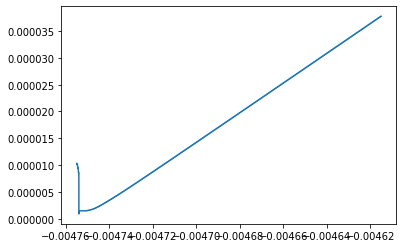

In [6]:
widths = []
for ind in range(numX):
    widths.append(FWHMe2(Yarray,out_field[:,ind]))

widths = np.asarray(widths)
plt.plot(Xarray,widths)